In [57]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

1.Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

2.Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

3.Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.

4.Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

5.İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?

In [38]:
states_all = pd.read_csv("states_all.csv")
states_all.head(10)

PRIMARY_KEY                 STATE  YEAR  ENROLL  \
0               1992_ALABAMA               ALABAMA  1992     NaN   
1                1992_ALASKA                ALASKA  1992     NaN   
2               1992_ARIZONA               ARIZONA  1992     NaN   
3              1992_ARKANSAS              ARKANSAS  1992     NaN   
4            1992_CALIFORNIA            CALIFORNIA  1992     NaN   
5              1992_COLORADO              COLORADO  1992     NaN   
6           1992_CONNECTICUT           CONNECTICUT  1992     NaN   
7              1992_DELAWARE              DELAWARE  1992     NaN   
8  1992_DISTRICT_OF_COLUMBIA  DISTRICT_OF_COLUMBIA  1992     NaN   
9               1992_FLORIDA               FLORIDA  1992     NaN   

   TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  \
0      2678885.0         304177.0      1659028.0       715680.0   
1      1049591.0         106780.0       720711.0       222100.0   
2      3258079.0         297888.0      1369815.0      1590376.0   
3      1711959.0         178571.0       958785.0       574603.0   
4     26260025.0        2072470.0     16546514.0      7641041.0   
5      3185173.0         163253.0      1307986.0      1713934.0   
6      3834302.0         143542.0      1342539.0      2348221.0   
7       645233.0          45945.0       420942.0       178346.0   
8       709480.0          64749.0            0.0       644731.0   
9     11506299.0         788420.0      5683949.0      5033930.0   

   TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE         ...           \
0          2653798.0                1481703.0         ...            
1           972488.0                 498362.0         ...            
2          3401580.0                1435908.0         ...            
3          1743022.0                 964323.0         ...            
4         27138832.0               14358922.0         ...            
5          3264826.0                1642466.0         ...            
6          3721338.0                2148041.0         ...            
7           638784.0                 372722.0         ...            
8           742893.0                 329160.0         ...            
9         11305642.0                5166374.0         ...            

   GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  \
0     57948.0     58025.0      41167.0      471564.0       196386.0   
1      9748.0      8789.0       6714.0       79117.0        30847.0   
2     55433.0     49081.0      37410.0      437127.0       175210.0   
3     34632.0     36011.0      27651.0      281338.0       123113.0   
4    418418.0    363296.0     270675.0     3286034.0      1372011.0   
5     50648.0     45025.0      34533.0      394904.0       160299.0   
6     38058.0     33691.0      28366.0      304284.0       126917.0   
7      8272.0      8012.0       6129.0       67495.0        28338.0   
8      5832.0      5000.0       3433.0       47009.0        18173.0   
9    164416.0    142372.0     100835.0     1276685.0       511557.0   

   GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
0      676174.0        208.327876        252.187522           207.963517   
1      112335.0               NaN               NaN                  NaN   
2      614881.0        215.253932        265.366278           206.212716   
3      405259.0        210.206028        256.312090           208.634458   
4     4717112.0        208.398961        260.892247           196.764414   
5      562613.0        221.023429        272.398433           213.480890   
6      436932.0        226.798480        273.739345           222.417599   
7       96296.0        217.899972        262.868585           206.389052   
8       70000.0        192.600553        234.924621           178.557612   
9     1819706.0        213.689751        259.908848           204.882606   

   AVG_READING_8_SCORE  
0                  NaN  
1           258.859712  
2           262.169895  
3           264.619665  
4              

1.Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

In [6]:
#Veri kümesinde yer alan değişkenlerinin tipleri 
states_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [7]:
Bos_Dolu_Durumu = states_all.isna()   
Bos_Dolu_Durumu.head()

PRIMARY_KEY  STATE   YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0        False  False  False    True          False            False   
1        False  False  False    True          False            False   
2        False  False  False    True          False            False   
3        False  False  False    True          False            False   
4        False  False  False    True          False            False   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0          False          False              False                    False   
1          False          False              False                    False   
2          False          False              False                    False   
3          False          False              False                    False   
4          False          False              False                    False   

          ...           GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  \
0         ...                False       False        False         False   
1         ...                False       False        False         False   
2         ...                False       False        False         False   
3         ...                False       False        False         False   
4         ...                False       False        False         False   

   GRADES_9_12_G  GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  \
0          False         False             False             False   
1          False         False              True              True   
2          False         False             False             False   
3          False         False             False             False   
4          False         False             False             False   

   AVG_READING_4_SCORE  AVG_READING_8_SCORE  
0                False                 True  
1                 True                False  
2                False                False  
3                False                False  
4                False                 True  

[5 rows x 25 columns]

In [8]:
# Eksik Degerler Nasil tespit edilir? 

#Pandas, bir veri çerçevesindeki her öğe için bir öğenin değeri yoksa (None) veya False ifadesini alırsa, True döndüren 
#.isnull () adlı bir metoda sahiptir. Ancak, bu metodu veri çerçevemizden çağırdığımızda, şunu elde ederiz:


states_all.isnull().head()

PRIMARY_KEY  STATE   YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0        False  False  False    True          False            False   
1        False  False  False    True          False            False   
2        False  False  False    True          False            False   
3        False  False  False    True          False            False   
4        False  False  False    True          False            False   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0          False          False              False                    False   
1          False          False              False                    False   
2          False          False              False                    False   
3          False          False              False                    False   
4          False          False              False                    False   

          ...           GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  \
0         ...                False       False        False         False   
1         ...                False       False        False         False   
2         ...                False       False        False         False   
3         ...                False       False        False         False   
4         ...                False       False        False         False   

   GRADES_9_12_G  GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  \
0          False         False             False             False   
1          False         False              True              True   
2          False         False             False             False   
3          False         False             False             False   
4          False         False             False             False   

   AVG_READING_4_SCORE  AVG_READING_8_SCORE  
0                False                 True  
1                 True                False  
2                False                False  
3                False                False  
4                False                 True  

[5 rows x 25 columns]

In [9]:
#her bir değişkenin eksik (null) değer oranını: 

states_all.isnull().sum()/states_all.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [29]:
# Her hücrenin boolean(True/False) olup olmadığını görmek için 
Bos_Dolu_Durumu.dtypes

PRIMARY_KEY                     bool
STATE                           bool
YEAR                            bool
ENROLL                          bool
TOTAL_REVENUE                   bool
FEDERAL_REVENUE                 bool
STATE_REVENUE                   bool
LOCAL_REVENUE                   bool
TOTAL_EXPENDITURE               bool
INSTRUCTION_EXPENDITURE         bool
SUPPORT_SERVICES_EXPENDITURE    bool
OTHER_EXPENDITURE               bool
CAPITAL_OUTLAY_EXPENDITURE      bool
GRADES_PK_G                     bool
GRADES_KG_G                     bool
GRADES_4_G                      bool
GRADES_8_G                      bool
GRADES_12_G                     bool
GRADES_1_8_G                    bool
GRADES_9_12_G                   bool
GRADES_ALL_G                    bool
AVG_MATH_4_SCORE                bool
AVG_MATH_8_SCORE                bool
AVG_READING_4_SCORE             bool
AVG_READING_8_SCORE             bool
dtype: object

In [30]:
#ilgili sütunda kaç adet boş /dolu hücre olduğu 
Bos_Hucre_Toplamı = Bos_Dolu_Durumu.sum()
Bos_Hucre_Toplamı

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [33]:
# Boş hücre sayısı x 100 / Tüm satır sayısı yaptığımızda 
# Boş Hücrelerin % sini bulmuş oluruz.
Bos_Hucre_Toplamı*100/len(states_all)

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

2.Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. 
Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

In [40]:
states_all2 = states_all.copy()
states_all2.head()

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

          ...           GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  \
0         ...              57948.0     58025.0      41167.0      471564.0   
1         ...               9748.0      8789.0       6714.0       79117.0   
2         ...              55433.0     49081.0      37410.0      437127.0   
3         ...              34632.0     36011.0      27651.0      281338.0   
4         ...             418418.0    363296.0     270675.0     3286034.0   

   GRADES_9_12_G  GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  \
0       196386.0      676174.0        208.327876        252.187522   
1        30847.0      112335.0               NaN               NaN   
2       175210.0      614881.0        215.253932        265.366278   
3       123113.0      405259.0        210.206028        256.312090   
4      1372011.0     4717112.0        208.398961        260.892247   

   AVG_READING_4_SCORE  AVG_READING_8_SCORE  
0           207.963517                  NaN  
1                  NaN           258.859712  
2           206.212716           262.169895  
3           208.634458           264.619665  
4           196.764414                  NaN  

[5 rows x 25 columns]

Öğrenci sayıları ve mali hususları doldurmak mantıklı çünkü eksik sayısı fazla değil. Ama not değerlerinde eksik çok fazla.

    AVG_MATH_4_SCORE               0.64
    AVG_MATH_8_SCORE               0.64
    AVG_READING_4_SCORE            0.64
    AVG_READING_8_SCORE            0.67

In [41]:
#Islem icin sutun adlarini cekiyoruz 
#states_all.columns
sütunlar = states_all2.columns
print(sütunlar)


Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


In [42]:
#Benzersiz değerleri incelemek için veri çerçevesinin sütunlarında .unique () yöntemini çağırabiliriz. 
#Örneğin, verilerdeki her bir sütuna ait tüm benzersiz değerleri almak için:

for sutun_adi in states_all2.columns:
    print("{} sütunundaki benzersiz değerler : {}".format(sutun_adi, states_all2[sutun_adi].unique()))

PRIMARY_KEY sütunundaki benzersiz değerler : ['1992_ALABAMA' '1992_ALASKA' '1992_ARIZONA' ... '2017_WEST_VIRGINIA'
 '2017_WISCONSIN' '2017_WYOMING']
STATE sütunundaki benzersiz değerler : ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND' 'SOUTH_CAROLINA'
 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN' 'WYOMING'
 'BUREAU_OF_INDIAN_AFFAIRS' 'DOD_OVERSEAS' 'DOD_DOMESTIC' 'AMERICAN_SAMOA'
 'GUAM' 'NORTHERN_MARIANAS' 'PUERTO_RICO' 'VIRGIN_ISLANDS' 'BI' 'DD'
 'NORTHERN_MARIANA_ISLANDS' 'DEPARTMENT_OF_DEFENSE'
 'BUREAU_OF_

In [43]:
for sutun_adi in sütunlar:
    for deger in states_all2["AVG_READING_8_SCORE"]:
        print("{} sütunu için problemli değerler :{}".format(sutun_adi, deger))
        try:
            float(deger)
            print("{} sütunu için problemli değerler :{}".format(sutun_adi, deger))
        except:
            print(deger)

PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :258.859712454914
PRIMARY_KEY sütunu için problemli değerler :258.859712454914
PRIMARY_KEY sütunu için problemli değerler :262.169894656696
PRIMARY_KEY sütunu için problemli değerler :262.169894656696
PRIMARY_KEY sütunu için problemli değerler :264.619664664416
PRIMARY_KEY sütunu için problemli değerler :264.619664664416
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :266.41968692282995
PRIMARY_KEY sütunu için problemli değerler :266.41968692282995
PRIMARY_KEY sütunu için problemli değerler :264.713904329936
PRIMARY_KEY sütunu için problemli değerler :264.713904329936
PRIMARY_KEY sütunu için problemli değerler :261.57792090563
PRIMARY_KEY sütunu için problemli değerler :261.57792090563
PRIMARY_KEY sütunu için problemli değerler :265.976765009526
PRIMARY_KEY s

PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerler :nan
PRIMARY_KEY sütunu için problemli değerl

PRIMARY_KEY sütunu için problemli değerler :265.08192180549497
PRIMARY_KEY sütunu için problemli değerler :265.08192180549497
PRIMARY_KEY sütunu için problemli değerler :268.450641614295
PRIMARY_KEY sütunu için problemli değerler :268.450641614295
PRIMARY_KEY sütunu için problemli değerler :261.236933515587
PRIMARY_KEY sütunu için problemli değerler :261.236933515587
PRIMARY_KEY sütunu için problemli değerler :266.216684155209
PRIMARY_KEY sütunu için problemli değerler :266.216684155209
PRIMARY_KEY sütunu için problemli değerler :269.55382331575
PRIMARY_KEY sütunu için problemli değerler :269.55382331575
PRIMARY_KEY sütunu için problemli değerler :265.767859953914
PRIMARY_KEY sütunu için problemli değerler :265.767859953914
PRIMARY_KEY sütunu için problemli değerler :259.75300239808604
PRIMARY_KEY sütunu için problemli değerler :259.75300239808604
PRIMARY_KEY sütunu için problemli değerler :267.355726574154
PRIMARY_KEY sütunu için problemli değerler :267.355726574154
PRIMARY_KEY sütunu

STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerler :nan
STATE sütunu için problemli değerl

STATE sütunu için problemli değerler :267.355726574154
STATE sütunu için problemli değerler :262.046852903713
STATE sütunu için problemli değerler :262.046852903713
STATE sütunu için problemli değerler :260.342576542804
STATE sütunu için problemli değerler :260.342576542804
STATE sütunu için problemli değerler :268.7524196631
STATE sütunu için problemli değerler :268.7524196631
STATE sütunu için problemli değerler :273.402640307413
STATE sütunu için problemli değerler :273.402640307413
STATE sütunu için problemli değerler :267.74477849910403
STATE sütunu için problemli değerler :267.74477849910403
STATE sütunu için problemli değerler :271.617022995208
STATE sütunu için problemli değerler :271.617022995208
STATE sütunu için problemli değerler :258.700303604492
STATE sütunu için problemli değerler :258.700303604492
STATE sütunu için problemli değerler :269.371456395493
STATE sütunu için problemli değerler :269.371456395493
YEAR sütunu için problemli değerler :nan
YEAR sütunu için problem

YEAR sütunu için problemli değerler :265.643729382276
YEAR sütunu için problemli değerler :264.729844537772
YEAR sütunu için problemli değerler :264.729844537772
YEAR sütunu için problemli değerler :264.55452746182596
YEAR sütunu için problemli değerler :264.55452746182596
YEAR sütunu için problemli değerler :267.336395789343
YEAR sütunu için problemli değerler :267.336395789343
YEAR sütunu için problemli değerler :268.833963566714
YEAR sütunu için problemli değerler :268.833963566714
YEAR sütunu için problemli değerler :254.68834784390492
YEAR sütunu için problemli değerler :254.68834784390492
YEAR sütunu için problemli değerler :269.872413013173
YEAR sütunu için problemli değerler :269.872413013173
YEAR sütunu için problemli değerler :271.222896649808
YEAR sütunu için problemli değerler :271.222896649808
YEAR sütunu için problemli değerler :275.36851762846
YEAR sütunu için problemli değerler :275.36851762846
YEAR sütunu için problemli değerler :265.194041240472
YEAR sütunu için probl

ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :265.363798443416
ENROLL sütunu için problemli değerler :265.363798443416
ENROLL sütunu için problemli değerler :265.807107945656
ENROLL sütunu için problemli değerler :265.807107945656
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :262.32512640240003
ENROLL sütunu için problemli değerler :262.32512640240003
ENROLL sütunu için problemli değerler :254.52363696023602
ENROLL sütunu için problemli değerler :254.52363696023602
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli değerler :nan
ENROLL sütunu için problemli

ENROLL sütunu için problemli değerler :268.25346768003504
ENROLL sütunu için problemli değerler :268.25346768003504
ENROLL sütunu için problemli değerler :268.200596266662
ENROLL sütunu için problemli değerler :268.200596266662
ENROLL sütunu için problemli değerler :266.76553060986
ENROLL sütunu için problemli değerler :266.76553060986
ENROLL sütunu için problemli değerler :267.772900145423
ENROLL sütunu için problemli değerler :267.772900145423
ENROLL sütunu için problemli değerler :255.46941777756905
ENROLL sütunu için problemli değerler :255.46941777756905
ENROLL sütunu için problemli değerler :268.391236298695
ENROLL sütunu için problemli değerler :268.391236298695
ENROLL sütunu için problemli değerler :267.905529723763
ENROLL sütunu için problemli değerler :267.905529723763
ENROLL sütunu için problemli değerler :274.497568115749
ENROLL sütunu için problemli değerler :274.497568115749
ENROLL sütunu için problemli değerler :264.496755061626
ENROLL sütunu için problemli değerler :264

TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan


TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan
TOTAL_REVENUE sütunu için problemli değerler :nan


FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVENUE sütunu için problemli değerler :nan
FEDERAL_REVE

FEDERAL_REVENUE sütunu için problemli değerler :260.121264611744
FEDERAL_REVENUE sütunu için problemli değerler :260.121264611744
FEDERAL_REVENUE sütunu için problemli değerler :264.225611626444
FEDERAL_REVENUE sütunu için problemli değerler :264.225611626444
FEDERAL_REVENUE sütunu için problemli değerler :267.750596675669
FEDERAL_REVENUE sütunu için problemli değerler :267.750596675669
FEDERAL_REVENUE sütunu için problemli değerler :265.119556331117
FEDERAL_REVENUE sütunu için problemli değerler :265.119556331117
FEDERAL_REVENUE sütunu için problemli değerler :260.30701989879503
FEDERAL_REVENUE sütunu için problemli değerler :260.30701989879503
FEDERAL_REVENUE sütunu için problemli değerler :268.941537575366
FEDERAL_REVENUE sütunu için problemli değerler :268.941537575366
FEDERAL_REVENUE sütunu için problemli değerler :259.20837071319903
FEDERAL_REVENUE sütunu için problemli değerler :259.20837071319903
FEDERAL_REVENUE sütunu için problemli değerler :261.428390874698
FEDERAL_REVENUE s

STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan


STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan
STATE_REVENUE sütunu için problemli değerler :nan


LOCAL_REVENUE sütunu için problemli değerler :272.692552866005
LOCAL_REVENUE sütunu için problemli değerler :272.692552866005
LOCAL_REVENUE sütunu için problemli değerler :259.790720651776
LOCAL_REVENUE sütunu için problemli değerler :259.790720651776
LOCAL_REVENUE sütunu için problemli değerler :258.70499279233997
LOCAL_REVENUE sütunu için problemli değerler :258.70499279233997
LOCAL_REVENUE sütunu için problemli değerler :251.33081069192403
LOCAL_REVENUE sütunu için problemli değerler :251.33081069192403
LOCAL_REVENUE sütunu için problemli değerler :264.88634244604697
LOCAL_REVENUE sütunu için problemli değerler :264.88634244604697
LOCAL_REVENUE sütunu için problemli değerler :262.826617097915
LOCAL_REVENUE sütunu için problemli değerler :262.826617097915
LOCAL_REVENUE sütunu için problemli değerler :264.095960900362
LOCAL_REVENUE sütunu için problemli değerler :264.095960900362
LOCAL_REVENUE sütunu için problemli değerler :267.450719560442
LOCAL_REVENUE sütunu için problemli değerle

TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu için problemli değerler :nan
TOTAL_EXPENDITURE sütunu içi

TOTAL_EXPENDITURE sütunu için problemli değerler :267.450719560442
TOTAL_EXPENDITURE sütunu için problemli değerler :267.413790936682
TOTAL_EXPENDITURE sütunu için problemli değerler :267.413790936682
TOTAL_EXPENDITURE sütunu için problemli değerler :261.96595099365396
TOTAL_EXPENDITURE sütunu için problemli değerler :261.96595099365396
TOTAL_EXPENDITURE sütunu için problemli değerler :253.23829428128897
TOTAL_EXPENDITURE sütunu için problemli değerler :253.23829428128897
TOTAL_EXPENDITURE sütunu için problemli değerler :269.920153818638
TOTAL_EXPENDITURE sütunu için problemli değerler :269.920153818638
TOTAL_EXPENDITURE sütunu için problemli değerler :265.240121492132
TOTAL_EXPENDITURE sütunu için problemli değerler :265.240121492132
TOTAL_EXPENDITURE sütunu için problemli değerler :273.284048809294
TOTAL_EXPENDITURE sütunu için problemli değerler :273.284048809294
TOTAL_EXPENDITURE sütunu için problemli değerler :260.31770609297297
TOTAL_EXPENDITURE sütunu için problemli değerler :26

INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :nan
INSTRUCTION_EXPENDITURE sütunu için prob

INSTRUCTION_EXPENDITURE sütunu için problemli değerler :268.197442761373
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :268.197442761373
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :250.063570104392
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :250.063570104392
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :263.442315999206
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :263.442315999206
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :270.937849960978
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :270.937849960978
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :267.030850555401
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :267.030850555401
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :252.348473866768
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :252.348473866768
INSTRUCTION_EXPENDITURE sütunu için problemli değerler :269.734588561039
INSTRUCTION_EXPENDITURE sütunu için problemli değer

SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :nan
SUPPORT_SERVICES_EXPENDIT

SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :270.141550284263
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :250.75317445252998
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :250.75317445252998
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :263.54571646767005
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :263.54571646767005
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :259.13670308841097
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :259.13670308841097
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :268.017670542433
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :268.017670542433
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :267.978979400559
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :267.978979400559
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli değerler :259.547225161046
SUPPORT_SERVICES_EXPENDITURE sütunu için problemli d

OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu içi

OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu için problemli değerler :nan
OTHER_EXPENDITURE sütunu içi

CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :268.124234884295
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :268.124234884295
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :253.172593739071
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :253.172593739071
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :256.409625298838
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :256.409625298838
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :255.320115210993
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :255.320115210993
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :257.998089007686
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :257.998089007686
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :251.007500405859
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :251.007500405859
CAPITAL_OUTLAY_EXPENDITURE sütunu için problemli değerler :267.592640864405
CAPITAL_OUTL

GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerl

GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerler :nan
GRADES_PK_G sütunu için problemli değerl

GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerler :nan
GRADES_KG_G sütunu için problemli değerl

GRADES_KG_G sütunu için problemli değerler :261.50245565870097
GRADES_KG_G sütunu için problemli değerler :261.50245565870097
GRADES_KG_G sütunu için problemli değerler :271.00908694257197
GRADES_KG_G sütunu için problemli değerler :271.00908694257197
GRADES_KG_G sütunu için problemli değerler :274.459542474537
GRADES_KG_G sütunu için problemli değerler :274.459542474537
GRADES_KG_G sütunu için problemli değerler :265.98498149856204
GRADES_KG_G sütunu için problemli değerler :265.98498149856204
GRADES_KG_G sütunu için problemli değerler :247.739153738325
GRADES_KG_G sütunu için problemli değerler :247.739153738325
GRADES_KG_G sütunu için problemli değerler :276.994367424941
GRADES_KG_G sütunu için problemli değerler :276.994367424941
GRADES_KG_G sütunu için problemli değerler :265.828297127322
GRADES_KG_G sütunu için problemli değerler :265.828297127322
GRADES_KG_G sütunu için problemli değerler :264.615713463699
GRADES_KG_G sütunu için problemli değerler :264.615713463699
GRADES_KG_G 

GRADES_4_G sütunu için problemli değerler :261.59573193942504
GRADES_4_G sütunu için problemli değerler :272.90664505005697
GRADES_4_G sütunu için problemli değerler :272.90664505005697
GRADES_4_G sütunu için problemli değerler :264.37829249338796
GRADES_4_G sütunu için problemli değerler :264.37829249338796
GRADES_4_G sütunu için problemli değerler :267.711358412271
GRADES_4_G sütunu için problemli değerler :267.711358412271
GRADES_4_G sütunu için problemli değerler :255.010828024612
GRADES_4_G sütunu için problemli değerler :255.010828024612
GRADES_4_G sütunu için problemli değerler :267.363673296442
GRADES_4_G sütunu için problemli değerler :267.363673296442
GRADES_4_G sütunu için problemli değerler :269.833415980195
GRADES_4_G sütunu için problemli değerler :269.833415980195
GRADES_4_G sütunu için problemli değerler :266.313690432675
GRADES_4_G sütunu için problemli değerler :266.313690432675
GRADES_4_G sütunu için problemli değerler :252.309915677623
GRADES_4_G sütunu için problem

GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sü

GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sütunu için problemli değerler :nan
GRADES_8_G sü

GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerler :nan
GRADES_12_G sütunu için problemli değerl

GRADES_12_G sütunu için problemli değerler :267.215011778953
GRADES_12_G sütunu için problemli değerler :271.765782480696
GRADES_12_G sütunu için problemli değerler :271.765782480696
GRADES_12_G sütunu için problemli değerler :269.221914635868
GRADES_12_G sütunu için problemli değerler :269.221914635868
GRADES_12_G sütunu için problemli değerler :261.695982235772
GRADES_12_G sütunu için problemli değerler :261.695982235772
GRADES_12_G sütunu için problemli değerler :274.307731748779
GRADES_12_G sütunu için problemli değerler :274.307731748779
GRADES_12_G sütunu için problemli değerler :276.37798779341
GRADES_12_G sütunu için problemli değerler :276.37798779341
GRADES_12_G sütunu için problemli değerler :255.87007704604198
GRADES_12_G sütunu için problemli değerler :255.87007704604198
GRADES_12_G sütunu için problemli değerler :266.346063235407
GRADES_12_G sütunu için problemli değerler :266.346063235407
GRADES_12_G sütunu için problemli değerler :264.540999710832
GRADES_12_G sütunu içi

GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu için problemli değerler :nan
GRADES_1_8_G sütunu 

GRADES_1_8_G sütunu için problemli değerler :264.540999710832
GRADES_1_8_G sütunu için problemli değerler :264.540999710832
GRADES_1_8_G sütunu için problemli değerler :267.779199654396
GRADES_1_8_G sütunu için problemli değerler :267.779199654396
GRADES_1_8_G sütunu için problemli değerler :269.086973442103
GRADES_1_8_G sütunu için problemli değerler :269.086973442103
GRADES_1_8_G sütunu için problemli değerler :261.931495221637
GRADES_1_8_G sütunu için problemli değerler :261.931495221637
GRADES_1_8_G sütunu için problemli değerler :268.282662715666
GRADES_1_8_G sütunu için problemli değerler :268.282662715666
GRADES_1_8_G sütunu için problemli değerler :272.085365342425
GRADES_1_8_G sütunu için problemli değerler :272.085365342425
GRADES_1_8_G sütunu için problemli değerler :266.677052388789
GRADES_1_8_G sütunu için problemli değerler :266.677052388789
GRADES_1_8_G sütunu için problemli değerler :261.449050699613
GRADES_1_8_G sütunu için problemli değerler :261.449050699613
GRADES_1

GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan
GRADES_9_12_G sütunu için problemli değerler :nan


GRADES_9_12_G sütunu için problemli değerler :261.449050699613
GRADES_9_12_G sütunu için problemli değerler :268.100772835989
GRADES_9_12_G sütunu için problemli değerler :268.100772835989
GRADES_9_12_G sütunu için problemli değerler :265.359504625647
GRADES_9_12_G sütunu için problemli değerler :265.359504625647
GRADES_9_12_G sütunu için problemli değerler :263.684137731278
GRADES_9_12_G sütunu için problemli değerler :263.684137731278
GRADES_9_12_G sütunu için problemli değerler :270.041925765873
GRADES_9_12_G sütunu için problemli değerler :270.041925765873
GRADES_9_12_G sütunu için problemli değerler :274.368547733738
GRADES_9_12_G sütunu için problemli değerler :274.368547733738
GRADES_9_12_G sütunu için problemli değerler :267.589864309109
GRADES_9_12_G sütunu için problemli değerler :267.589864309109
GRADES_9_12_G sütunu için problemli değerler :272.036124410819
GRADES_9_12_G sütunu için problemli değerler :272.036124410819
GRADES_9_12_G sütunu için problemli değerler :nan
GRADE

GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu 

GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu için problemli değerler :nan
GRADES_ALL_G sütunu 

AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerler :nan
AVG_MATH_4_SCORE sütunu için problemli değerle

AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerle

AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerler :nan
AVG_MATH_8_SCORE sütunu için problemli değerle

AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :258.77725796924096
AVG_READING_4_SCORE sütunu için p

AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerler :nan
AVG_READING_4_SCORE sütunu için problemli değerl

AVG_READING_8_SCORE sütunu için problemli değerler :254.129173669956
AVG_READING_8_SCORE sütunu için problemli değerler :264.288057457975
AVG_READING_8_SCORE sütunu için problemli değerler :264.288057457975
AVG_READING_8_SCORE sütunu için problemli değerler :259.528486560755
AVG_READING_8_SCORE sütunu için problemli değerler :259.528486560755
AVG_READING_8_SCORE sütunu için problemli değerler :269.239984852546
AVG_READING_8_SCORE sütunu için problemli değerler :269.239984852546
AVG_READING_8_SCORE sütunu için problemli değerler :268.67823553327
AVG_READING_8_SCORE sütunu için problemli değerler :268.67823553327
AVG_READING_8_SCORE sütunu için problemli değerler :259.495771007061
AVG_READING_8_SCORE sütunu için problemli değerler :259.495771007061
AVG_READING_8_SCORE sütunu için problemli değerler :265.08924671643996
AVG_READING_8_SCORE sütunu için problemli değerler :265.08924671643996
AVG_READING_8_SCORE sütunu için problemli değerler :270.700536709088
AVG_READING_8_SCORE sütunu için 

In [44]:
states_all2.isnull().sum()*100/states_all2.count()

PRIMARY_KEY                       0.000000
STATE                             0.000000
YEAR                              0.000000
ENROLL                           21.399512
TOTAL_REVENUE                    16.562500
FEDERAL_REVENUE                  16.562500
STATE_REVENUE                    16.562500
LOCAL_REVENUE                    16.562500
TOTAL_EXPENDITURE                16.562500
INSTRUCTION_EXPENDITURE          16.562500
SUPPORT_SERVICES_EXPENDITURE     16.562500
OTHER_EXPENDITURE                21.399512
CAPITAL_OUTLAY_EXPENDITURE       16.562500
GRADES_PK_G                      13.115997
GRADES_KG_G                       9.705882
GRADES_4_G                        9.625276
GRADES_8_G                        9.625276
GRADES_12_G                       9.625276
GRADES_1_8_G                      9.625276
GRADES_9_12_G                     9.625276
GRADES_ALL_G                     13.115997
AVG_MATH_4_SCORE                178.358209
AVG_MATH_8_SCORE                180.451128
AVG_READING

In [45]:
states_all2.STATE.value_counts()

DISTRICT_OF_COLUMBIA                        29
VIRGINIA                                    28
WEST_VIRGINIA                               26
HAWAII                                      26
INDIANA                                     26
IOWA                                        26
OHIO                                        26
MICHIGAN                                    26
ALABAMA                                     26
CALIFORNIA                                  26
MISSISSIPPI                                 26
DELAWARE                                    26
MISSOURI                                    26
NEVADA                                      26
UTAH                                        26
NEW_JERSEY                                  26
MARYLAND                                    26
MINNESOTA                                   26
ILLINOIS                                    26
NEW_HAMPSHIRE                               26
ARKANSAS                                    26
TEXAS        

In [46]:
states_all["ENROLL"].fillna(states_all2["ENROLL"].mean(), inplace=True)
states_all["YEAR"].fillna(states_all2["YEAR"].mean(), inplace=True)
states_all["TOTAL_REVENUE"].fillna(states_all2["TOTAL_REVENUE"].mean(), inplace=True)
states_all["FEDERAL_REVENUE"].fillna(states_all2["FEDERAL_REVENUE"].mean(), inplace=True)
states_all["STATE_REVENUE"].fillna(states_all2["STATE_REVENUE"].mean(), inplace=True)
states_all["LOCAL_REVENUE"].fillna(states_all2["LOCAL_REVENUE"].mean(), inplace=True)
states_all["TOTAL_EXPENDITURE"].fillna(states_all2["TOTAL_EXPENDITURE"].mean(), inplace=True)
states_all["INSTRUCTION_EXPENDITURE"].fillna(states_all2["INSTRUCTION_EXPENDITURE"].mean(), inplace=True)
states_all["SUPPORT_SERVICES_EXPENDITURE"].fillna(states_all2["SUPPORT_SERVICES_EXPENDITURE"].mean(), inplace=True)
states_all["OTHER_EXPENDITURE"].fillna(states_all2["OTHER_EXPENDITURE"].mean(), inplace=True)
states_all["CAPITAL_OUTLAY_EXPENDITURE"].fillna(states_all2["CAPITAL_OUTLAY_EXPENDITURE"].mean(), inplace=True)
states_all["GRADES_PK_G"].fillna(states_all2["GRADES_PK_G"].mean(), inplace=True)
states_all["GRADES_KG_G"].fillna(states_all2["GRADES_KG_G"].mean(), inplace=True)
states_all["GRADES_4_G"].fillna(states_all2["GRADES_4_G"].mean(), inplace=True)
states_all["GRADES_8_G"].fillna(states_all2["GRADES_8_G"].mean(), inplace=True)
states_all["GRADES_12_G"].fillna(states_all2["GRADES_12_G"].mean(), inplace=True)
states_all["GRADES_1_8_G"].fillna(states_all2["GRADES_1_8_G"].mean(), inplace=True)
states_all["GRADES_9_12_G"].fillna(states_all2["GRADES_9_12_G"].mean(), inplace=True)
states_all["GRADES_ALL_G"].fillna(states_all2["GRADES_ALL_G"].mean(), inplace=True)
states_all["YEAR"].fillna(states_all2["YEAR"].mean(), inplace=True)


In [48]:
# alternatif Cozum
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for col in fill_list:
    states_all2.loc[:, col].fillna(states_all2.loc[:, col].mean(), inplace=True)

In [49]:
states_all2.isnull().sum()*100/states_all2.count()

PRIMARY_KEY                       0.000000
STATE                             0.000000
YEAR                              0.000000
ENROLL                            0.000000
TOTAL_REVENUE                     0.000000
FEDERAL_REVENUE                   0.000000
STATE_REVENUE                     0.000000
LOCAL_REVENUE                     0.000000
TOTAL_EXPENDITURE                 0.000000
INSTRUCTION_EXPENDITURE           0.000000
SUPPORT_SERVICES_EXPENDITURE      0.000000
OTHER_EXPENDITURE                 0.000000
CAPITAL_OUTLAY_EXPENDITURE        0.000000
GRADES_PK_G                       0.000000
GRADES_KG_G                       0.000000
GRADES_4_G                        0.000000
GRADES_8_G                        0.000000
GRADES_12_G                       0.000000
GRADES_1_8_G                      0.000000
GRADES_9_12_G                     0.000000
GRADES_ALL_G                      0.000000
AVG_MATH_4_SCORE                178.358209
AVG_MATH_8_SCORE                180.451128
AVG_READING

3.Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.


In [51]:
#Alternatif Yol
#Genel ortalama
states_all3 = states_all.copy()
states_all3.mean()

YEAR                            2.004434e+03
ENROLL                          9.159308e+05
TOTAL_REVENUE                   9.092082e+06
FEDERAL_REVENUE                 7.663723e+05
STATE_REVENUE                   4.216553e+06
LOCAL_REVENUE                   4.109157e+06
TOTAL_EXPENDITURE               9.196681e+06
INSTRUCTION_EXPENDITURE         4.762966e+06
SUPPORT_SERVICES_EXPENDITURE    2.680331e+06
OTHER_EXPENDITURE               4.292046e+05
CAPITAL_OUTLAY_EXPENDITURE      9.027693e+05
GRADES_PK_G                     1.760161e+04
GRADES_KG_G                     6.374676e+04
GRADES_4_G                      6.453893e+04
GRADES_8_G                      6.427106e+04
GRADES_12_G                     5.426892e+04
GRADES_1_8_G                    5.192140e+05
GRADES_9_12_G                   2.470714e+05
GRADES_ALL_G                    8.024415e+05
AVG_MATH_4_SCORE                2.347683e+02
AVG_MATH_8_SCORE                2.784147e+02
AVG_READING_4_SCORE             2.188662e+02
AVG_READIN

In [53]:
states_all["ENROLL"].fillna(states_all3.groupby(by='YEAR').mean()["ENROLL"], inplace=True)
states_all["AVG_MATH_4_SCORE"].fillna(states_all3.groupby(by='YEAR').mean()["AVG_MATH_4_SCORE"], inplace=True)
states_all["TOTAL_REVENUE"].fillna(states_all3.groupby(by='YEAR').mean()["TOTAL_REVENUE"], inplace=True)
states_all["FEDERAL_REVENUE"].fillna(states_all3.groupby(by='YEAR').mean()["FEDERAL_REVENUE"], inplace=True)
states_all["STATE_REVENUE"].fillna(states_all3.groupby(by='YEAR').mean()["STATE_REVENUE"], inplace=True)
states_all["LOCAL_REVENUE"].fillna(states_all3.groupby(by='YEAR').mean()["LOCAL_REVENUE"], inplace=True)
states_all["TOTAL_EXPENDITURE"].fillna(states_all3.groupby(by='YEAR').mean()["TOTAL_EXPENDITURE"], inplace=True)
states_all["INSTRUCTION_EXPENDITURE"].fillna(states_all3.groupby(by='YEAR').mean()["INSTRUCTION_EXPENDITURE"], inplace=True)
states_all["SUPPORT_SERVICES_EXPENDITURE"].fillna(states_all3.groupby(by='YEAR').mean()["SUPPORT_SERVICES_EXPENDITURE"], inplace=True)
states_all["OTHER_EXPENDITURE"].fillna(states_all3.groupby(by='YEAR').mean()["OTHER_EXPENDITURE"], inplace=True)
states_all["CAPITAL_OUTLAY_EXPENDITURE"].fillna(states_all3.groupby(by='YEAR').mean()["CAPITAL_OUTLAY_EXPENDITURE"], inplace=True)
states_all["GRADES_PK_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_PK_G"], inplace=True)
states_all["GRADES_KG_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_KG_G"], inplace=True)
states_all["GRADES_4_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_4_G"], inplace=True)
states_all["GRADES_8_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_8_G"], inplace=True)
states_all["GRADES_12_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_12_G"], inplace=True)
states_all["GRADES_1_8_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_1_8_G"], inplace=True)
states_all["GRADES_9_12_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_9_12_G"], inplace=True)
states_all["GRADES_ALL_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_ALL_G"], inplace=True)
states_all["AVG_MATH_8_SCORE"].fillna(states_all3.groupby(by='YEAR').mean()["AVG_MATH_8_SCORE"], inplace=True)
states_all["AVG_READING_4_SCORE"].fillna(states_all3.groupby(by='YEAR').mean()["AVG_READING_4_SCORE"], inplace=True)
states_all["AVG_READING_8_SCORE"].fillna(states_all3.groupby(by='YEAR').mean()["AVG_READING_8_SCORE"], inplace=True)

In [54]:
#Alternatif Yol

years = states_all3["YEAR"].unique()
for col in fill_list:
    for year in years:
        states_all3.loc[states_all3["YEAR"] == year,col].fillna(
            states_all3[states_all3["YEAR"] == year][col].mean(), inplace = True)

In [55]:
years

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017], dtype=int64)

4.Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

In [27]:
states_all4 = states_all.copy()
for col in fill_list:
    states_all4.loc[:,col].interpolate(inplace=True)
    

5.İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?

In [31]:
for col in fill_list:
    display ("{} sutunu icin istatistikler:".format(col))
    display(pd.concat([states_all[col],states_all2[col], states_all3[col], states_all4[col]], axis=1).describe())

'TOTAL_REVENUE sutunu icin istatistikler:'

TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.280000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   8.090707e+06
std     1.174519e+07   1.174519e+07   1.115317e+07
min     4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.186305e+06   2.044669e+06
50%     5.079546e+06   5.079546e+06   4.005586e+06
75%     1.085985e+07   1.085985e+07   9.276958e+06
max     8.921726e+07   8.921726e+07   8.921726e+07

'FEDERAL_REVENUE sutunu icin istatistikler:'

FEDERAL_REVENUE  FEDERAL_REVENUE  FEDERAL_REVENUE
count     1.280000e+03     1.280000e+03     1.492000e+03
mean      7.663723e+05     7.663723e+05     6.749565e+05
std       1.145242e+06     1.145242e+06     1.084242e+06
min       3.102000e+04     3.102000e+04     3.102000e+04
25%       1.893540e+05     1.893540e+05     1.230120e+05
50%       4.033765e+05     4.033765e+05     3.286840e+05
75%       8.289660e+05     8.289660e+05     7.505032e+05
max       9.990221e+06     9.990221e+06     9.990221e+06

'STATE_REVENUE sutunu icin istatistikler:'

STATE_REVENUE  STATE_REVENUE  STATE_REVENUE
count   1.280000e+03   1.280000e+03   1.492000e+03
mean    4.216553e+06   4.216553e+06   3.784503e+06
std     5.543072e+06   5.543072e+06   5.242583e+06
min     0.000000e+00   0.000000e+00   0.000000e+00
25%     1.153097e+06   1.153097e+06   1.175899e+06
50%     2.537074e+06   2.537074e+06   2.122772e+06
75%     5.080939e+06   5.080939e+06   4.269811e+06
max     5.090457e+07   5.090457e+07   5.090457e+07

'LOCAL_REVENUE sutunu icin istatistikler:'

LOCAL_REVENUE  LOCAL_REVENUE  LOCAL_REVENUE
count   1.280000e+03   1.280000e+03   1.492000e+03
mean    4.109157e+06   4.109157e+06   3.631247e+06
std     5.482971e+06   5.482971e+06   5.212326e+06
min     2.209300e+04   2.209300e+04   2.209300e+04
25%     7.158345e+05   7.158345e+05   7.457580e+05
50%     2.055780e+06   2.055780e+06   1.525442e+06
75%     4.768680e+06   4.768680e+06   3.959033e+06
max     3.610526e+07   3.610526e+07   3.610526e+07

'TOTAL_EXPENDITURE sutunu icin istatistikler:'

TOTAL_EXPENDITURE  TOTAL_EXPENDITURE  TOTAL_EXPENDITURE
count       1.280000e+03       1.280000e+03       1.492000e+03
mean        9.196681e+06       9.196681e+06       8.178960e+06
std         1.197813e+07       1.197813e+07       1.137247e+07
min         4.816650e+05       4.816650e+05       4.816650e+05
25%         2.165404e+06       2.165404e+06       2.034229e+06
50%         5.234506e+06       5.234506e+06       4.025104e+06
75%         1.074519e+07       1.074519e+07       9.434922e+06
max         8.532013e+07       8.532013e+07       8.532013e+07

'INSTRUCTION_EXPENDITURE sutunu icin istatistikler:'

INSTRUCTION_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
count             1.280000e+03             1.280000e+03   
mean              4.762966e+06             4.762966e+06   
std               6.293004e+06             6.293004e+06   
min               2.655490e+05             2.655490e+05   
25%               1.168032e+06             1.168032e+06   
50%               2.657452e+06             2.657452e+06   
75%               5.568028e+06             5.568028e+06   
max               4.396452e+07             4.396452e+07   

       INSTRUCTION_EXPENDITURE  
count             1.492000e+03  
mean              4.217127e+06  
std               5.980898e+06  
min               2.655490e+05  
25%               9.214940e+05  
50%               2.095198e+06  
75%               4.938820e+06  
max               4.396452e+07

'SUPPORT_SERVICES_EXPENDITURE sutunu icin istatistikler:'

SUPPORT_SERVICES_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
count                  1.280000e+03                  1.280000e+03   
mean                   2.680331e+06                  2.680331e+06   
std                    3.353349e+06                  3.353349e+06   
min                    1.399630e+05                  1.399630e+05   
25%                    6.357900e+05                  6.357900e+05   
50%                    1.525406e+06                  1.525406e+06   
75%                    3.229651e+06                  3.229651e+06   
max                    2.605802e+07                  2.605802e+07   

       SUPPORT_SERVICES_EXPENDITURE  
count                  1.492000e+03  
mean                   2.382702e+06  
std                    3.190809e+06  
min                    1.399630e+05  
25%                    5.857000e+05  
50%                    1.161078e+06  
75%                    2.795888e+06  
max                    2.605802e+07

'OTHER_EXPENDITURE sutunu icin istatistikler:'

OTHER_EXPENDITURE  OTHER_EXPENDITURE  OTHER_EXPENDITURE
count       1.229000e+03       1.229000e+03       1.441000e+03
mean        4.292046e+05       4.292046e+05       3.739412e+05
std         5.340693e+05       5.340693e+05       5.108375e+05
min         1.154100e+04       1.154100e+04       1.154100e+04
25%         1.028310e+05       1.028310e+05       5.379000e+04
50%         2.715960e+05       2.715960e+05       2.117130e+05
75%         5.186000e+05       5.186000e+05       4.673210e+05
max         3.995951e+06       3.995951e+06       3.995951e+06

'CAPITAL_OUTLAY_EXPENDITURE sutunu icin istatistikler:'

CAPITAL_OUTLAY_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE  \
count                1.280000e+03                1.280000e+03   
mean                 9.027693e+05                9.027693e+05   
std                  1.327562e+06                1.327562e+06   
min                  1.270800e+04                1.270800e+04   
25%                  1.815645e+05                1.815645e+05   
50%                  5.102595e+05                5.102595e+05   
75%                  9.668515e+05                9.668515e+05   
max                  1.022366e+07                1.022366e+07   

       CAPITAL_OUTLAY_EXPENDITURE  
count                1.492000e+03  
mean                 8.390461e+05  
std                  1.239501e+06  
min                  1.270800e+04  
25%                  2.163398e+05  
50%                  4.543020e+05  
75%                  8.975950e+05  
max                  1.022366e+07

'GRADES_PK_G sutunu icin istatistikler:'

GRADES_PK_G    GRADES_PK_G    GRADES_PK_G
count    1319.000000    1319.000000    1492.000000
mean    17601.614102   17601.614102   15792.646783
std     30016.166447   30016.166447   28700.544342
min         0.000000       0.000000       0.000000
25%      2021.000000    2021.000000    1486.325472
50%      8106.000000    8106.000000    5555.500000
75%     22295.000000   22295.000000   19431.000000
max    250911.000000  250911.000000  250911.000000

'GRADES_KG_G sutunu icin istatistikler:'

GRADES_KG_G    GRADES_KG_G    GRADES_KG_G
count    1360.000000    1360.000000    1492.000000
mean    63746.761029   63746.761029   58444.160188
std     80205.138143   80205.138143   78453.021974
min       544.000000     544.000000     544.000000
25%     11745.000000   11745.000000    9595.000000
50%     41597.500000   41597.500000   38077.500000
75%     73865.250000   73865.250000   70372.750000
max    530531.000000  530531.000000  530531.000000

'GRADES_4_G sutunu icin istatistikler:'

GRADES_4_G     GRADES_4_G     GRADES_4_G
count    1361.000000    1361.000000    1492.000000
mean    64538.927259   64538.927259   59214.239611
std     80293.387625   80293.387625   78595.506298
min       633.000000     633.000000     633.000000
25%     13739.000000   13739.000000    9741.500000
50%     43272.000000   43272.000000   37152.000000
75%     75481.000000   75481.000000   71814.250000
max    493415.000000  493415.000000  493415.000000

'GRADES_8_G sutunu icin istatistikler:'

GRADES_8_G     GRADES_8_G     GRADES_8_G
count    1361.000000    1361.000000    1492.000000
mean    64271.057311   64271.057311   58943.264410
std     78910.545776   78910.545776   77309.153013
min       437.000000     437.000000     437.000000
25%     13342.000000   13342.000000    9845.750000
50%     43339.000000   43339.000000   37652.500000
75%     76566.000000   76566.000000   72131.000000
max    500143.000000  500143.000000  500143.000000

'GRADES_12_G sutunu icin istatistikler:'

GRADES_12_G   GRADES_12_G    GRADES_12_G
count    1361.00000    1361.00000    1492.000000
mean    54268.92432   54268.92432   49749.655161
std     67889.27623   67889.27623   66462.686407
min       311.00000     311.00000     311.000000
25%     10919.00000   10919.00000    8661.750000
50%     36735.00000   36735.00000   32926.000000
75%     67460.00000   67460.00000   64616.250000
max    498403.00000  498403.00000  498403.000000

'GRADES_1_8_G sutunu icin istatistikler:'

GRADES_1_8_G  GRADES_1_8_G  GRADES_1_8_G
count  1.361000e+03  1.361000e+03  1.492000e+03
mean   5.192140e+05  5.192140e+05  4.763128e+05
std    6.436384e+05  6.436384e+05  6.301837e+05
min    4.878000e+03  4.878000e+03  4.878000e+03
25%    1.106260e+05  1.106260e+05  7.884750e+04
50%    3.457750e+05  3.457750e+05  3.041060e+05
75%    6.119050e+05  6.119050e+05  5.749118e+05
max    3.929869e+06  3.929869e+06  3.929869e+06

'GRADES_9_12_G sutunu icin istatistikler:'

GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G
count   1.361000e+03   1.361000e+03   1.492000e+03
mean    2.470714e+05   2.470714e+05   2.265455e+05
std     3.077056e+05   3.077056e+05   3.012735e+05
min     1.808000e+03   1.808000e+03   1.808000e+03
25%     5.147100e+04   5.147100e+04   3.841350e+04
50%     1.642600e+05   1.642600e+05   1.438930e+05
75%     2.905020e+05   2.905020e+05   2.825390e+05
max     2.013687e+06   2.013687e+06   2.013687e+06

'GRADES_ALL_G sutunu icin istatistikler:'

GRADES_ALL_G  GRADES_ALL_G  GRADES_ALL_G
count  1.319000e+03  1.319000e+03  1.492000e+03
mean   8.024415e+05  8.024415e+05  7.424483e+05
std    9.707031e+05  9.707031e+05  9.305219e+05
min    7.254000e+03  7.254000e+03  7.254000e+03
25%    1.810650e+05  1.810650e+05  1.691602e+05
50%    5.503420e+05  5.503420e+05  4.527355e+05
75%    9.282755e+05  9.282755e+05  8.830622e+05
max    5.944746e+06  5.944746e+06  5.944746e+06

'AVG_MATH_4_SCORE sutunu icin istatistikler:'

AVG_MATH_4_SCORE  AVG_MATH_4_SCORE  AVG_MATH_4_SCORE
count        536.000000        536.000000       1492.000000
mean         234.768293        234.768293        231.831206
std           10.221511         10.221511          9.888230
min          187.134670        187.134670        187.134670
25%          229.694352        229.694352        223.340211
50%          237.238552        237.238552        233.721360
75%          241.995486        241.995486        239.951138
max          253.420961        253.420961        253.420961

'AVG_MATH_8_SCORE sutunu icin istatistikler:'

AVG_MATH_8_SCORE  AVG_MATH_8_SCORE  AVG_MATH_8_SCORE
count        532.000000        532.000000       1492.000000
mean         278.414711        278.414711        274.751965
std           10.159722         10.159722          8.676490
min          232.831510        232.831510        232.831510
25%          272.761598        272.761598        268.959808
50%          280.618803        280.618803        274.343601
75%          285.347428        285.347428        281.420997
max          300.568235        300.568235        300.568235

'AVG_READING_4_SCORE sutunu icin istatistikler:'

AVG_READING_4_SCORE  AVG_READING_4_SCORE  AVG_READING_4_SCORE
count           533.000000           533.000000          1492.000000
mean            218.866154           218.866154           218.278270
std               7.769616             7.769616             6.095477
min             178.557612           178.557612           178.557612
25%             214.663401           214.663401           214.568273
50%             220.416034           220.416034           218.954112
75%             223.999337           223.999337           222.376359
max             236.773867           236.773867           236.773867

'AVG_READING_8_SCORE sutunu icin istatistikler:'

AVG_READING_8_SCORE  AVG_READING_8_SCORE  AVG_READING_8_SCORE
count           498.000000           498.000000          1491.000000
mean            263.661132           263.661132           262.125714
std               6.803725             6.803725             5.310612
min             236.379102           236.379102           236.379102
25%             259.533171           259.533171           258.619193
50%             265.010912           265.010912           261.079602
75%             268.190121           268.190121           266.227052
max             280.499130           280.499130           280.499130

In [59]:
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

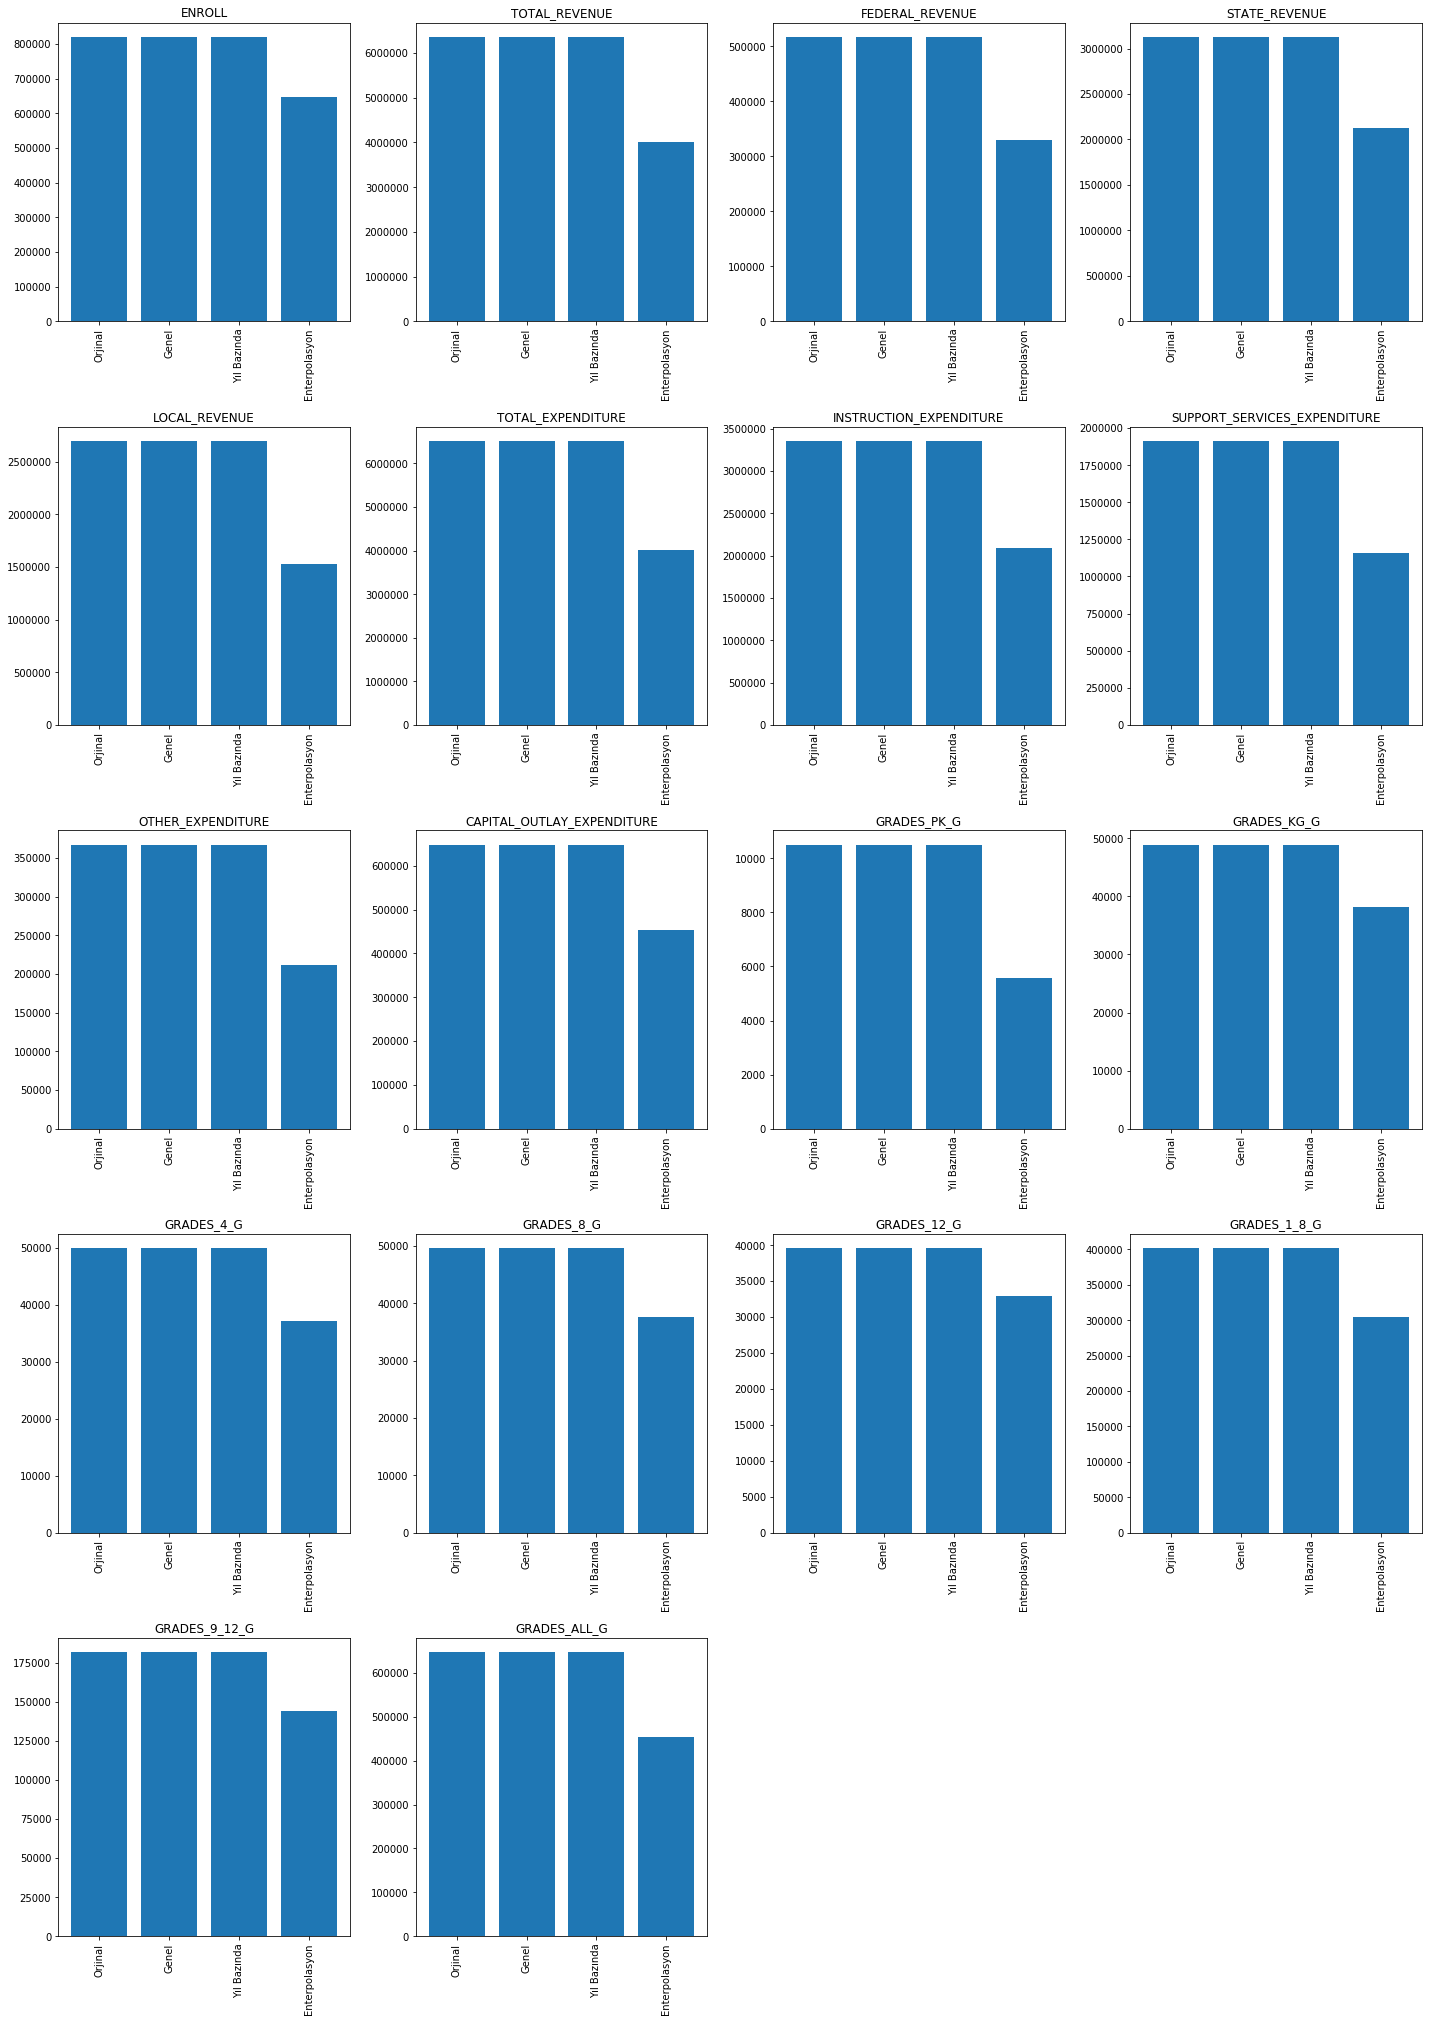

In [60]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([states_all[col], states_all2[col],
                     states_all3[col], states_all4[col]], axis=1)
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["Orjinal", "Genel", "Yıl Bazında", "Enterpolasyon"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("{}".format(col))
    
plt.tight_layout()
plt.show()